In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
data = pd.read_csv('data/hospital-costs.csv')

In [4]:
data.head()

,Year,Facility Id,Facility Name,APR DRG Code,APR Severity of Illness Code,APR DRG Description,APR Severity of Illness Description,APR Medical Surgical Code,APR Medical Surgical Description,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost
0,2011,324,Adirondack Medical Center-Saranac Lake Site,4,4,Tracheostomy W MV 96+ Hours W Extensive Proced...,Extreme,P,Surgical,3,361289.0,210882.0,196080.0,123347.0
1,2011,324,Adirondack Medical Center-Saranac Lake Site,5,4,Tracheostomy W MV 96+ Hours W/O Extensive Proc...,Extreme,P,Surgical,1,102190.0,102190.0,59641.0,59641.0
2,2011,324,Adirondack Medical Center-Saranac Lake Site,24,2,Extracranial Vascular Procedures,Moderate,P,Surgical,6,14172.0,13506.0,6888.0,6445.0
3,2011,324,Adirondack Medical Center-Saranac Lake Site,26,1,Other Nervous System & Related Procedures,Minor,P,Surgical,1,8833.0,8833.0,4259.0,4259.0
4,2011,324,Adirondack Medical Center-Saranac Lake Site,41,1,Nervous System Malignancy,Minor,M,Medical,1,5264.0,5264.0,1727.0,1727.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383493 entries, 0 to 383492
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   Year                                 383493 non-null  int64  
 1   Facility Id                          383493 non-null  int64  
 2   Facility Name                        383493 non-null  object 
 3   APR DRG Code                         383493 non-null  int64  
 4   APR Severity of Illness Code         383493 non-null  int64  
 5   APR DRG Description                  383493 non-null  object 
 6   APR Severity of Illness Description  383329 non-null  object 
 7   APR Medical Surgical Code            383329 non-null  object 
 8   APR Medical Surgical Description     383493 non-null  object 
 9   Discharges                           383493 non-null  int64  
 10  Mean Charge                          383493 non-null  float64
 11  Median Charge

In [6]:
data.describe()

,Year,Facility Id,APR DRG Code,APR Severity of Illness Code,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost
count,383493.000000,383493.000000,383493.000000,383493.000000,383493.000000,3.834930e+05,3.834930e+05,3.834930e+05,3.834930e+05
mean,2009.992096,931.197406,375.874013,2.338846,20.514742,4.057436e+04,3.718595e+04,1.683462e+04,1.527954e+04
std,0.816167,633.379977,246.981328,1.042050,79.758116,6.591054e+04,6.261059e+04,2.952751e+04,2.782836e+04
min,2009.000000,1.000000,1.000000,0.000000,1.000000,8.000000e+00,8.000000e+00,2.000000e+00,2.000000e+00
25%,2009.000000,511.000000,192.000000,1.000000,2.000000,1.180900e+04,1.062500e+04,4.995000e+03,4.457000e+03
50%,2010.000000,889.000000,313.000000,2.000000,5.000000,2.219100e+04,1.994200e+04,8.900000e+03,7.860000e+03
75%,2011.000000,1306.000000,546.000000,3.000000,16.000000,4.393600e+04,3.971000e+04,1.775800e+04,1.587700e+04
max,2011.000000,9250.000000,956.000000,4.000000,6342.000000,4.736482e+06,4.736482e+06,2.395947e+06,2.395947e+06


In [7]:
data['Total Charges'] = data['Discharges']*data['Mean Charge']
data['Total Cost'] = data['Discharges']*data['Mean Cost']
data['Markup'] = data['Total Charges']/data['Total Cost']


In [8]:
data.head()

,Year,Facility Id,Facility Name,APR DRG Code,APR Severity of Illness Code,APR DRG Description,APR Severity of Illness Description,APR Medical Surgical Code,APR Medical Surgical Description,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost,Total Charges,Total Cost,Markup
0,2011,324,Adirondack Medical Center-Saranac Lake Site,4,4,Tracheostomy W MV 96+ Hours W Extensive Proced...,Extreme,P,Surgical,3,361289.0,210882.0,196080.0,123347.0,1083867.0,588240.0,1.842559
1,2011,324,Adirondack Medical Center-Saranac Lake Site,5,4,Tracheostomy W MV 96+ Hours W/O Extensive Proc...,Extreme,P,Surgical,1,102190.0,102190.0,59641.0,59641.0,102190.0,59641.0,1.713419
2,2011,324,Adirondack Medical Center-Saranac Lake Site,24,2,Extracranial Vascular Procedures,Moderate,P,Surgical,6,14172.0,13506.0,6888.0,6445.0,85032.0,41328.0,2.057491
3,2011,324,Adirondack Medical Center-Saranac Lake Site,26,1,Other Nervous System & Related Procedures,Minor,P,Surgical,1,8833.0,8833.0,4259.0,4259.0,8833.0,4259.0,2.073961
4,2011,324,Adirondack Medical Center-Saranac Lake Site,41,1,Nervous System Malignancy,Minor,M,Medical,1,5264.0,5264.0,1727.0,1727.0,5264.0,1727.0,3.048060


In [9]:
data.tail()

,Year,Facility Id,Facility Name,APR DRG Code,APR Severity of Illness Code,APR DRG Description,APR Severity of Illness Description,APR Medical Surgical Code,APR Medical Surgical Description,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost,Total Charges,Total Cost,Markup
383488,2009,1153,Wyoming County Community Hospital,951,3,Moderately Extensive Procedure Unrelated To Pr...,Major,P,Surgical,5,13572.0,12615.0,14433.0,15835.0,67860.0,72165.0,0.940345
383489,2009,1153,Wyoming County Community Hospital,952,3,Nonextensive Procedure Unrelated To Principal ...,Major,P,Surgical,4,8323.0,8179.0,9520.0,8674.0,33292.0,38080.0,0.874265
383490,2009,1153,Wyoming County Community Hospital,952,2,Nonextensive Procedure Unrelated To Principal ...,Moderate,P,Surgical,5,7746.0,5120.0,7257.0,5321.0,38730.0,36285.0,1.067383
383491,2009,1153,Wyoming County Community Hospital,952,1,Nonextensive Procedure Unrelated To Principal ...,Minor,P,Surgical,1,7892.0,7892.0,6528.0,6528.0,7892.0,6528.0,1.208946
383492,2009,1153,Wyoming County Community Hospital,956,0,Ungroupable,NaN,NaN,Other,3,1069.0,1309.0,1719.0,1756.0,3207.0,5157.0,0.621873


In [10]:
data[data['Markup'] == data['Markup'].max()]

,Year,Facility Id,Facility Name,APR DRG Code,APR Severity of Illness Code,APR DRG Description,APR Severity of Illness Description,APR Medical Surgical Code,APR Medical Surgical Description,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost,Total Charges,Total Cost,Markup
111925,2011,1302,SUNY Downstate Medical Center at LICH,614,1,Neonate Bwt 1500-1999G W Or W/O Other Signific...,Minor,M,Medical,2,21544.0,21544.0,1034.0,1034.0,43088.0,2068.0,20.83559


In [11]:
data[data['Markup'] == data['Markup'].min()]

,Year,Facility Id,Facility Name,APR DRG Code,APR Severity of Illness Code,APR DRG Description,APR Severity of Illness Description,APR Medical Surgical Code,APR Medical Surgical Description,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost,Total Charges,Total Cost,Markup
370760,2009,74,TLC Health Network Tri-County Memorial Hospital,772,1,Alcohol & Drug Dependence W Rehab Or Rehab/Det...,Minor,M,Medical,115,13396.0,16159.0,847674.0,1027297.0,1540540.0,97482510.0,0.015803


In [12]:
topgroup = data.groupby(data['APR DRG Description']).sum()
topgroup.nlargest(10, 'Discharges')

,Year,Facility Id,APR DRG Code,APR Severity of Illness Code,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost,Total Charges,Total Cost,Markup
APR DRG Description,,,,,,,,,,,,
"Neonate Birthwt >2499G, Normal Newborn Or Neonate W Other Problem",2506459,1158978,798080,2465,632412,8005177.0,6728958.0,3425481.0,2872408.0,2.956415e+09,1.168223e+09,3053.809686
Vaginal Delivery,2795902,1293922,778960,3055,458034,17544653.0,15730162.0,8796377.0,7940799.0,4.548525e+09,2.180764e+09,2788.028072
Cesarean Delivery,2982835,1385560,801360,3446,245265,34657038.0,30741809.0,16555432.0,14808369.0,4.141654e+09,1.895200e+09,3118.917468
Heart Failure,4649114,1992811,448722,5743,173826,62850361.0,52744159.0,27087824.0,21931701.0,4.840064e+09,1.967942e+09,5721.466185
Other Pneumonia,4773738,2036354,330125,5907,162344,57313683.0,48483892.0,24120620.0,19807719.0,3.724033e+09,1.408873e+09,5878.394761
Septicemia & Disseminated Infections,4413960,1941785,1581120,5637,161739,70434499.0,57513128.0,29234395.0,23052570.0,8.182069e+09,3.180766e+09,5550.591196
Chronic Obstructive Pulmonary Disease,4691326,1992065,326760,5762,146461,56060735.0,47750018.0,22983044.0,19116627.0,3.174697e+09,1.182314e+09,5840.209888
Cellulitis & Other Bacterial Skin Infections,4612946,1989773,878985,5566,124617,57895360.0,49495346.0,24426327.0,20438930.0,2.361641e+09,9.023553e+08,5676.148247
Cardiac Arrhythmia & Conduction Disorders,4546610,1961234,454662,5557,121042,50982965.0,43366224.0,21958748.0,18151111.0,2.316573e+09,9.441466e+08,5699.363574


In [13]:
net = data[['Facility Name', 'Total Charges', 'Total Cost']].copy()
net.tail()

,Facility Name,Total Charges,Total Cost
383488,Wyoming County Community Hospital,67860.0,72165.0
383489,Wyoming County Community Hospital,33292.0,38080.0
383490,Wyoming County Community Hospital,38730.0,36285.0
383491,Wyoming County Community Hospital,7892.0,6528.0
383492,Wyoming County Community Hospital,3207.0,5157.0


In [14]:
group = net.groupby('Facility Name').sum().copy()

In [15]:
group['Net Income'] = group['Total Charges'] - group['Total Cost']

In [16]:
group.head()

,Total Charges,Total Cost,Net Income
Facility Name,,,
Adirondack Medical Center-Saranac Lake Site,1.415735e+08,7.742766e+07,6.414584e+07
Albany Medical Center - South Clinical Campus,1.802808e+06,1.432784e+06,3.700240e+05
Albany Medical Center Hospital,3.763945e+09,1.336299e+09,2.427646e+09
Albany Memorial Hospital,2.219740e+08,9.490717e+07,1.270669e+08
Alice Hyde Medical Center,8.723797e+07,4.105882e+07,4.617915e+07


### Part 4: Focus in on Viral Meningitis

In [17]:
newdf = data[data['APR DRG Description'] == 'Viral Meningitis']
newdf.head()

,Year,Facility Id,Facility Name,APR DRG Code,APR Severity of Illness Code,APR DRG Description,APR Severity of Illness Description,APR Medical Surgical Code,APR Medical Surgical Description,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost,Total Charges,Total Cost,Markup
24,2011,324,Adirondack Medical Center-Saranac Lake Site,51,1,Viral Meningitis,Minor,M,Medical,1,17116.0,17116.0,7006.0,7006.0,17116.0,7006.0,2.443049
557,2011,1,Albany Medical Center Hospital,51,1,Viral Meningitis,Minor,M,Medical,19,13212.0,11914.0,4569.0,3920.0,251028.0,86811.0,2.891661
558,2011,1,Albany Medical Center Hospital,51,2,Viral Meningitis,Moderate,M,Medical,11,21197.0,14197.0,7131.0,3923.0,233167.0,78441.0,2.972514
559,2011,1,Albany Medical Center Hospital,51,3,Viral Meningitis,Major,M,Medical,6,28074.0,22846.0,7495.0,5812.0,168444.0,44970.0,3.745697
560,2011,1,Albany Medical Center Hospital,51,4,Viral Meningitis,Extreme,M,Medical,1,130600.0,130600.0,39086.0,39086.0,130600.0,39086.0,3.341350


In [18]:
newdf[(newdf['APR DRG Description'] == 'Viral Meningitis') & (newdf['Mean Charge'] == newdf['Mean Charge'].min())]

#(newdf['APR Severity of Illness Description'] == 'Moderate')

,Year,Facility Id,Facility Name,APR DRG Code,APR Severity of Illness Code,APR DRG Description,APR Severity of Illness Description,APR Medical Surgical Code,APR Medical Surgical Description,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost,Total Charges,Total Cost,Markup
258259,2009,739,Aurelia Osborn Fox Memorial Hospital,51,2,Viral Meningitis,Moderate,M,Medical,1,1179.0,1179.0,1040.0,1040.0,1179.0,1040.0,1.133654


In [19]:
newdf2 = newdf.drop(['Total Charges','Total Cost','APR Medical Surgical Description','APR Medical Surgical Code','APR DRG Code','APR Severity of Illness Code', 'Facility Id', 'Year', 'Markup'], axis=1)

In [20]:
newdf2.sort_values(by='Mean Charge', ascending=True).head(1)

,Facility Name,APR DRG Description,APR Severity of Illness Description,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost
258259,Aurelia Osborn Fox Memorial Hospital,Viral Meningitis,Moderate,1,1179.0,1179.0,1040.0,1040.0


In [21]:
newdf2[newdf2['Mean Charge'] == newdf2['Mean Charge'].min()]

,Facility Name,APR DRG Description,APR Severity of Illness Description,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost
258259,Aurelia Osborn Fox Memorial Hospital,Viral Meningitis,Moderate,1,1179.0,1179.0,1040.0,1040.0


In [22]:
newdf2[(newdf2['Discharges'] > 3) & (newdf['APR Severity of Illness Description'] == 'Moderate')]


,Facility Name,APR DRG Description,APR Severity of Illness Description,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost
558,Albany Medical Center Hospital,Viral Meningitis,Moderate,11,21197.0,14197.0,7131.0,3923.0
2681,Arnot Ogden Medical Center,Viral Meningitis,Moderate,9,13371.0,12968.0,6601.0,6588.0
4491,Bellevue Hospital Center,Viral Meningitis,Moderate,6,13572.0,12370.0,10302.0,9389.0
6753,Beth Israel Medical Center/Petrie Campus,Viral Meningitis,Moderate,10,37921.0,33878.0,9769.0,9100.0
8290,Bronx-Lebanon Hospital Center - Concourse Divi...,Viral Meningitis,Moderate,5,10273.0,9950.0,8562.0,8388.0
...,...,...,...,...,...,...,...,...
374766,University Hospital SUNY Health Science Center,Viral Meningitis,Moderate,6,17923.0,10156.0,9835.0,6435.0
377219,Westchester Medical Center,Viral Meningitis,Moderate,7,34138.0,35549.0,10788.0,9630.0
378345,White Plains Hospital Center,Viral Meningitis,Moderate,8,14114.0,11460.0,5827.0,4481.0
379242,Winthrop-University Hospital,Viral Meningitis,Moderate,16,21234.0,18240.0,5083.0,4165.0


In [23]:
newdf2[(newdf2['Discharges'] > 3) & (newdf['APR Severity of Illness Description'] == 'Moderate')].nlargest(10,'Mean Charge')

,Facility Name,APR DRG Description,APR Severity of Illness Description,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost
234825,St Lukes Roosevelt Hospital - St Lukes Hospita...,Viral Meningitis,Moderate,4,79245.0,48006.0,24743.0,14736.0
170416,Lenox Hill Hospital,Viral Meningitis,Moderate,6,63347.0,50198.0,8000.0,7091.0
133191,Beth Israel Medical Center/Petrie Campus,Viral Meningitis,Moderate,8,62308.0,38797.0,17263.0,10742.0
233119,St Luke's Cornwall Hospital/Newburgh,Viral Meningitis,Moderate,4,53140.0,45567.0,13518.0,11921.0
243602,University Hospital,Viral Meningitis,Moderate,9,51146.0,49094.0,17316.0,15842.0
120030,Westchester Medical Center,Viral Meningitis,Moderate,9,44756.0,39093.0,15557.0,14267.0
355099,St Charles Hospital,Viral Meningitis,Moderate,6,44496.0,36543.0,10899.0,9439.0
311698,Montefiore Med Center - Jack D Weiler Hosp of ...,Viral Meningitis,Moderate,6,43948.0,45394.0,17843.0,11061.0
173218,Long Island Jewish Medical Center,Viral Meningitis,Moderate,15,43513.0,41738.0,9337.0,7750.0
250026,Winthrop-University Hospital,Viral Meningitis,Moderate,8,42987.0,15849.0,9920.0,3947.0


In [24]:
newdf2[(newdf2['Discharges'] > 3) & (newdf['APR Severity of Illness Description'] == 'Moderate')].nsmallest(1,'Mean Charge')
#(newdf['APR Severity of Illness Description'] == 'Moderate') & (newdf['Mean Charge'] == newdf['Mean Charge'].min()) & 

,Facility Name,APR DRG Description,APR Severity of Illness Description,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost
14426,Cayuga Medical Center at Ithaca,Viral Meningitis,Moderate,6,5738.0,5111.0,3949.0,3522.0


In [25]:
newdf2.groupby('Facility Name').agg({'Discharges':'sum'}).sort_values(by='Discharges', ascending=False)

,Discharges
Facility Name,
North Shore University Hospital,158
Montefiore Medical Center - Henry & Lucy Moses Div,152
Strong Memorial Hospital,117
Women And Children's Hospital Of Buffalo,116
Winthrop-University Hospital,109
...,...
Mount Vernon Hospital,1
Margaretville Hospital,1
Little Falls Hospital,1


In [26]:
data.corr()

,Year,Facility Id,APR DRG Code,APR Severity of Illness Code,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost,Total Charges,Total Cost,Markup
Year,1.000000,-0.004502,0.000759,0.014800,-0.000737,0.017348,0.016708,0.014160,0.013495,0.012640,0.011242,-0.003978
Facility Id,-0.004502,1.000000,0.026195,0.007045,0.042903,0.124868,0.116622,0.129292,0.119041,0.073126,0.078670,0.001506
APR DRG Code,0.000759,0.026195,1.000000,-0.028321,0.031875,-0.004966,-0.006707,-0.008352,-0.010613,-0.011406,-0.002956,-0.023582
APR Severity of Illness Code,0.014800,0.007045,-0.028321,1.000000,-0.097712,0.364076,0.349696,0.333330,0.319788,0.049289,0.043540,-0.002492
Discharges,-0.000737,0.042903,0.031875,-0.097712,1.000000,-0.042952,-0.048231,-0.042193,-0.048046,0.530158,0.495710,0.012531
Mean Charge,0.017348,0.124868,-0.004966,0.364076,-0.042952,1.000000,0.978373,0.854616,0.834385,0.238365,0.211930,0.141068
Median Charge,0.016708,0.116622,-0.006707,0.349696,-0.048231,0.978373,1.000000,0.830290,0.850249,0.204850,0.178947,0.139097
Mean Cost,0.014160,0.129292,-0.008352,0.333330,-0.042193,0.854616,0.830290,1.000000,0.972832,0.195907,0.261886,-0.100140
Median Cost,0.013495,0.119041,-0.010613,0.319788,-0.048046,0.834385,0.850249,0.972832,1.000000,0.163159,0.227732,-0.094103
Total Charges,0.012640,0.073126,-0.011406,0.049289,0.530158,0.238365,0.204850,0.195907,0.163159,1.000000,0.890563,0.076731


### Part 5 Data can be tricky

In [28]:
data.groupby(['APR DRG Description', 'APR Severity of Illness Description']).count().sort_values(by='Mean Charge',ascending=False)

,,Year,Facility Id,Facility Name,APR DRG Code,APR Severity of Illness Code,APR Medical Surgical Code,APR Medical Surgical Description,Discharges,Mean Charge,Median Charge,Mean Cost,Median Cost,Total Charges,Total Cost,Markup
APR DRG Description,APR Severity of Illness Description,,,,,,,,,,,,,,,
Cellulitis & Other Bacterial Skin Infections,Moderate,609,609,609,609,609,609,609,609,609,609,609,609,609,609,609
Other Pneumonia,Moderate,608,608,608,608,608,608,608,608,608,608,608,608,608,608,608
Kidney & Urinary Tract Infections,Moderate,604,604,604,604,604,604,604,604,604,604,604,604,604,604,604
Other Pneumonia,Major,604,604,604,604,604,604,604,604,604,604,604,604,604,604,604
Cellulitis & Other Bacterial Skin Infections,Minor,603,603,603,603,603,603,603,603,603,603,603,603,603,603,603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Neonate Bwt 2000-2499G, Normal Newborn Or Neonate W Other Problem",Extreme,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Preterm Labor,Extreme,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Neonate W Ecmo,Moderate,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [117]:
data['APR DRG Description'].value_counts()

Other Pneumonia                                       2375
Chronic Obstructive Pulmonary Disease                 2334
Heart Failure                                         2313
Cellulitis & Other Bacterial Skin Infections          2295
Kidney & Urinary Tract Infections                     2290
                                                      ... 
Extensive 3Rd Degree Burns W Skin Graft                 49
Principal Diagnosis Invalid As Discharge Diagnosis      48
Heart &/Or Lung Transplant                              43
Pancreas Transplant                                     41
Neonate W Ecmo                                          39
Name: APR DRG Description, Length: 315, dtype: int64

In [29]:
a = np.random.randint(1000, size=50)
b = np.random.randint(1000, size=50)

In [40]:
c = a +b
c
even = c[np.where(c%2==0)]
odd = c[np.where(c%2!=0)]

In [41]:
even, odd

(array([ 420, 1332, 1330,  830,  900, 1820,  956, 1498,  764,  386, 1410,
        1794,  696, 1194, 1030,  348,  556,  464, 1234,  996, 1110,  934,
         654, 1062]),
 array([1943, 1521,  939, 1305, 1183,  545,  621,  885, 1245, 1261, 1061,
        1225, 1029,  771, 1575, 1301, 1079,  447,  911,  717, 1741, 1735,
        1227, 1157, 1145,  903]))

In [43]:
def
fig, ax = plt.subplots
ax.scatter(even)

NameError: name 'ax' is not defined

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#a = np.random.randint(1000, size=50)
#b = np.random.randint(1000, size=50)
def random_gen(size):
    a = np.random.randint(1000, size=size)
    b = np.random.randint(1000, size=size)
    return a,b


def scatter_plt(ax, a, b, color_code):
#     a = np.random.randint(1000, size=size)
#     b = np.random.randint(1000, size=size)
    ax.scatter(a, b, color=color_code) #label for key-legend
#     ax.colorbar()
    #return a, b
#fig, ax = plt.subplots()
# fig, ax = plt.subplots(2,2)
#   ^ returns np array error when calling ax.scatter(a,b)
# fig, ax = plt.subplots(2,2, figsize=(5,5))
#ax.scatter(a,b)
#fig.tight_layout()

def even_or_odd(a, b):
    c = a + b
    even = c[np.where(c%2==0)]
    odd = c[np.where(c%2!=0)]
    return even, odd

In [50]:
a, b = random_gen(50)

In [51]:
color_code = np.where((a+b) % 2 ==0, 'r', 'b')

In [52]:
#even = a[np.where((a+b) % 2 == 0)] + b[np.where((a+b) % 2 == 0)]
#odd = a[np.where((a+b) % 2 != 0)] + b[np.where((a+b) % 2 != 0)]
c = a+ b
even = c[np.where(c%2==0)]
odd = c[np.where(c%2!=0)]
print(even)
print(odd)

[1728 1814  714 1830 1036 1272  762  694 1020  288  810  940  626  872
  768  822  606  918  644  410 1206 1758]
[1481 1185  931  739  917 1297  605 1071  737  687 1317  471  891 1275
 1581  917  453  537  663  759 1565 1479 1015 1489 1089 1051 1163  847]


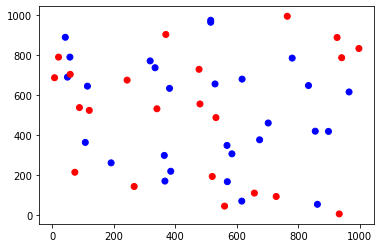

In [53]:
fig, ax = plt.subplots()
scatter_plt(ax, a, b, color_code)

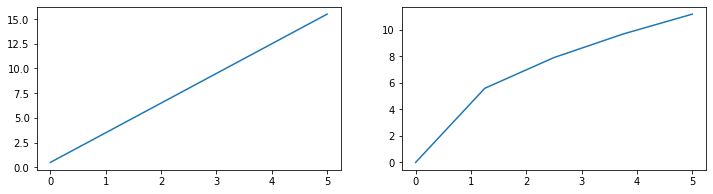

In [54]:
linear = lambda x: 3*x+.5
quadratic = lambda x: 5*x**.5

functions = [linear, quadratic]

x = np.linspace(0,5,5)

fig , axs = plt.subplots(1,2, figsize=(12,3))

for f, ax in zip(functions, axs.flatten()):
    ax.plot(x, f(x))

[Text(0, 0, 'grapes'), Text(0, 0, 'oranges'), Text(0, 0, 'hockey pucks')]

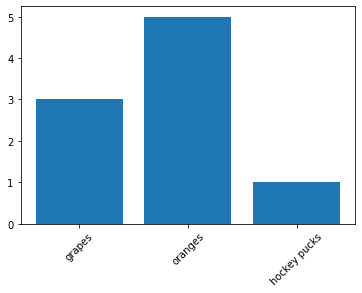

In [55]:
barheights = [3,5,1]
barlabels = ['grapes', 'oranges', 'hockey pucks']
fig, ax = plt.subplots()
ax.bar(np.arange(len(barheights)), barheights)
x_pos = np.arange(len(barheights))
ax.set_xticks(x_pos)
ax.set_xticklabels(barlabels, rotation=45)